In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\coding\ML\Machine learning\stroke\stroke.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
import seaborn as sns
# sns.pairplot(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data=data.replace(to_replace=np.nan,value=data.mean())

In [8]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
correlation = data.corr()
# sns.heatmap(correlation,annot=True)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

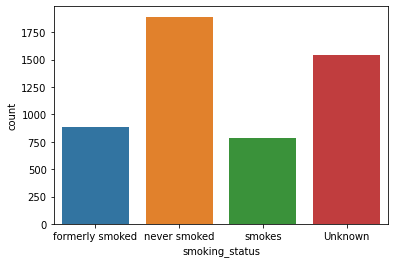

In [10]:
# count of smoking status
sns.countplot(x=data['smoking_status'])

In [11]:
data.corrwith(data['stroke'])

id                   0.006388
age                  0.245257
hypertension         0.127904
heart_disease        0.134914
avg_glucose_level    0.131945
bmi                  0.038947
stroke               1.000000
dtype: float64

In [12]:
data.drop(['id','gender'],axis="columns", inplace=True)

In [13]:
data.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [14]:
cat = ['ever_married','Residence_type','smoking_status','work_type']
for i in cat:
    print(len(i))
    dummy = pd.get_dummies(data[i],drop_first=True,prefix=f"{i}_")
    data = pd.concat([data,dummy],axis=1)

12
14
14
9


In [15]:
data = data.drop([*cat],axis=1)

In [16]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married__Yes,Residence_type__Urban,smoking_status__formerly smoked,smoking_status__never smoked,smoking_status__smokes,work_type__Never_worked,work_type__Private,work_type__Self-employed,work_type__children
0,67.0,0,1,228.69,36.600000,1,1,1,1,0,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.400000,1,1,1,0,0,1,0,1,0,0
4,79.0,1,0,174.12,24.000000,1,1,0,0,1,0,0,0,1,0


In [17]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married__Yes,Residence_type__Urban,smoking_status__formerly smoked,smoking_status__never smoked,smoking_status__smokes,work_type__Never_worked,work_type__Private,work_type__Self-employed,work_type__children
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,0.656164,0.508023,0.173190,0.370254,0.154403,0.004305,0.572407,0.160274,0.134442
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320,0.475034,0.499985,0.378448,0.482920,0.361370,0.065480,0.494778,0.366896,0.341160
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married__Yes,Residence_type__Urban,smoking_status__formerly smoked,smoking_status__never smoked,smoking_status__smokes,work_type__Never_worked,work_type__Private,work_type__Self-employed,work_type__children
0,67.0,0,1,228.69,36.600000,1,1,1,1,0,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.400000,1,1,1,0,0,1,0,1,0,0
4,79.0,1,0,174.12,24.000000,1,1,0,0,1,0,0,0,1,0


In [19]:
data.corrwith(data['stroke']).sort_values(ascending=False)

stroke                             1.000000
age                                0.245257
heart_disease                      0.134914
avg_glucose_level                  0.131945
hypertension                       0.127904
ever_married__Yes                  0.108340
smoking_status__formerly smoked    0.064556
work_type__Self-employed           0.062168
bmi                                0.038947
Residence_type__Urban              0.015458
work_type__Private                 0.011888
smoking_status__smokes             0.008939
smoking_status__never smoked      -0.004129
work_type__Never_worked           -0.014882
work_type__children               -0.083869
dtype: float64

In [20]:
X = data.drop('stroke',axis=1).values
y = data['stroke'].values

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
skf = StratifiedShuffleSplit(n_splits=10, test_size=0.2,random_state=5)

In [22]:
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [23]:
X_train.shape

(4088, 14)

In [24]:
y_train.shape

(4088,)

In [29]:
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score
imputer = KNNImputer(n_neighbors=2)
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f = f1_score(y_true = y_test , y_pred = y_pred,average = 'weighted')
    
print(f)

0.9109089516074717
